In [224]:
import os
import pandas as pd

In [225]:
image_dirs_training = {}
for directories in os.listdir('data/training'):
    if directories.startswith('.'):
        continue
    image_dirs_training[directories] = len(os.listdir(os.path.join("data/training", directories)))

In [226]:
image_dirs_testing = {}
for directories in os.listdir('data/testing'):
    if directories.startswith('.'):
        continue
    image_dirs_testing[directories] = len(os.listdir(os.path.join("data/testing", directories)))

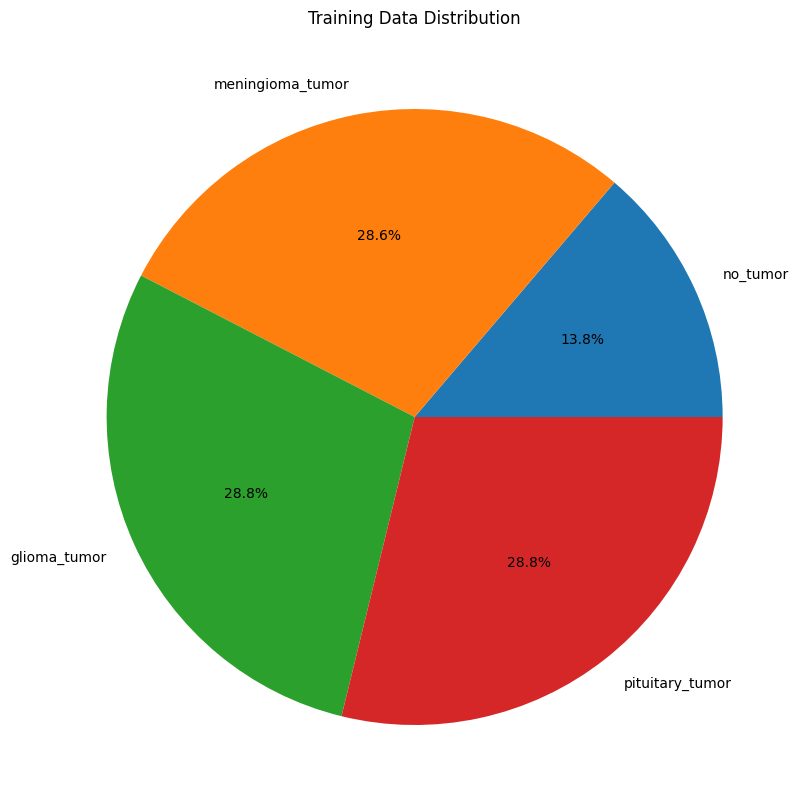

In [227]:
#Plot a pie chart of the training data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.pie(list(image_dirs_training.values()), labels=list(image_dirs_training.keys()), autopct='%1.1f%%')
plt.title('Training Data Distribution')
plt.show()

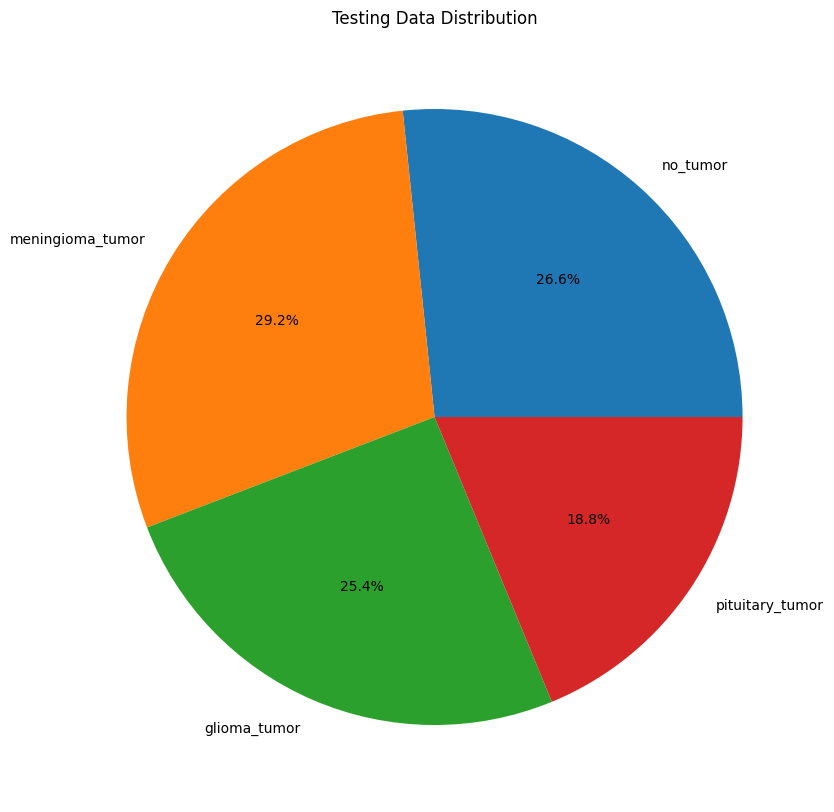

In [228]:
#Plot a pie chart of the testing data
plt.figure(figsize=(10,10))
plt.pie(list(image_dirs_testing.values()), labels=list(image_dirs_testing.keys()), autopct='%1.1f%%')
plt.title('Testing Data Distribution')
plt.show()

In [229]:
#Compare total size of training and testing data
total_training = sum(image_dirs_training.values())
total_testing = sum(image_dirs_testing.values())

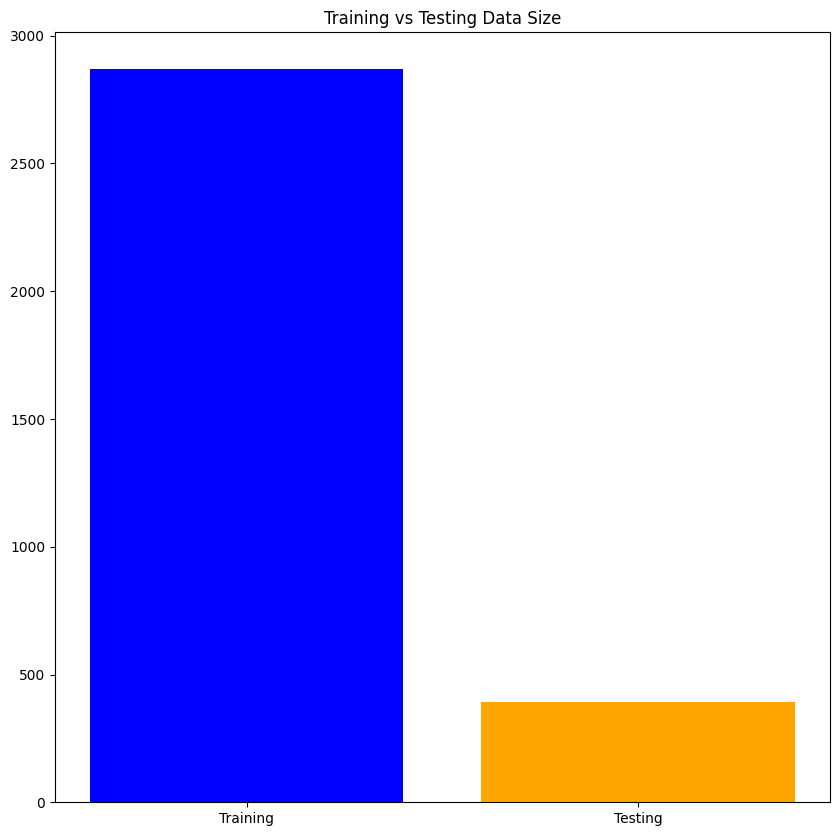

In [230]:
#Plot a bar chart of the training and testing data
plt.figure(figsize=(10,10))
plt.bar(['Training', 'Testing'], [total_training, total_testing], color=['blue', 'orange'])
plt.title('Training vs Testing Data Size')
plt.show()

In [231]:
import cv2
image_size = {}
image_dataframe = pd.DataFrame({
    'image_name': [],
    'height': [],
    'width': [],
    'channels': [],
    'class': []
}).set_index('image_name')
for files in os.listdir('data/training'):
    if files.startswith('.'):
        continue
    image_size_per_dir = 0
    img_in_current_dir = os.listdir('data/training/' + files)
    total_images = len(img_in_current_dir)
    if files.startswith('.'):
        continue
    for image in img_in_current_dir:
        image_name = image.split('.')[0]
        img = cv2.imread(os.path.join('data/training', files, image))
        height, width, channels = img.shape # Get image dimensions extract from shape tuple
        image_dataframe.loc[image_name] = {
            'height': height,
            'width': width,
            'channels': channels,
            'class': files
        }

In [232]:
image_dataframe

,height,width,channels,class
image_name,,,,
image(115),243,236,3,no_tumor
image(142),236,236,3,no_tumor
image(49),229,235,3,no_tumor
image(1),290,236,3,no_tumor
image(284),225,225,3,no_tumor
...,...,...,...,...
p (663),512,512,3,pituitary_tumor
p (399),512,512,3,pituitary_tumor
p (233),512,512,3,pituitary_tumor


<Axes: xlabel='class'>

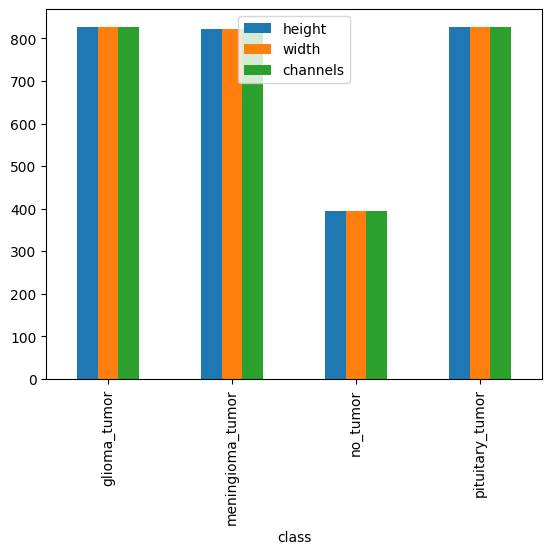

In [233]:
image_dataframe.groupby('class').count().plot(kind='bar')

In [234]:
image_dataframe.groupby('class').agg({
    'height': ['mean', 'min', 'max'],
    'width': ['mean', 'min', 'max'],
    'channels': ['mean', 'min', 'max'],
})

height                  width            channels      \
                        mean  min   max        mean  min   max     mean min   
class                                                                         
glioma_tumor      512.000000  512   512  512.000000  512   512      3.0   3   
meningioma_tumor  483.686131  207  1427  480.599757  180  1275      3.0   3   
no_tumor          352.817722  198  1446  349.663291  200  1375      3.0   3   
pituitary_tumor   510.036276  202  1365  510.074970  201  1365      3.0   3   

                      
                 max  
class                 
glioma_tumor       3  
meningioma_tumor   3  
no_tumor           3  
pituitary_tumor    3

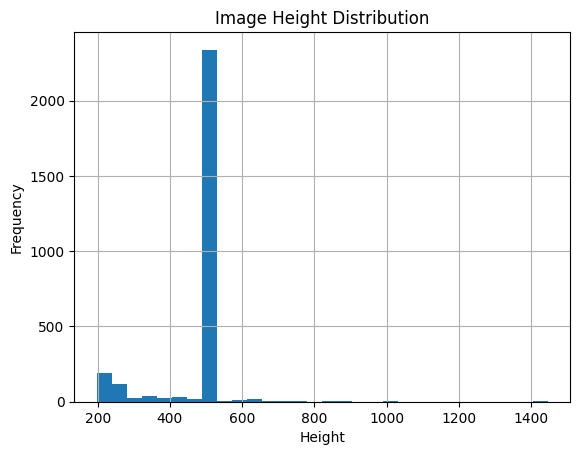

In [235]:
#Plot height distribution
image_dataframe.height.hist(bins=30)
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

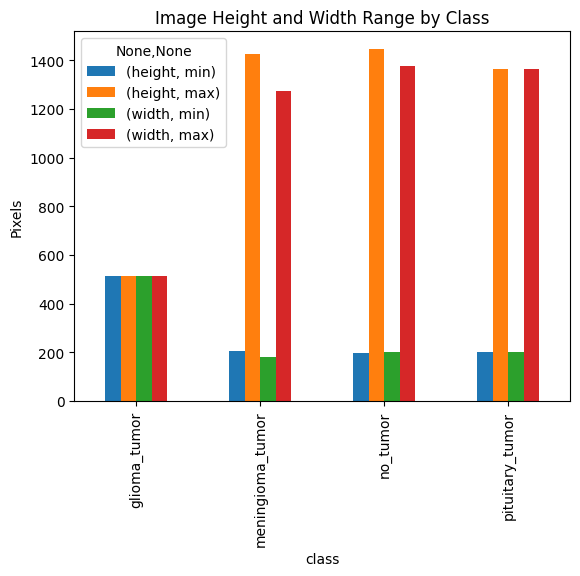

In [237]:
image_dataframe.groupby('class').agg({
    'height': ['min', 'max'],
    'width': ['min', 'max'],
}).plot(kind='bar')
plt.title('Image Height and Width Range by Class')
plt.ylabel('Pixels')
plt.show()

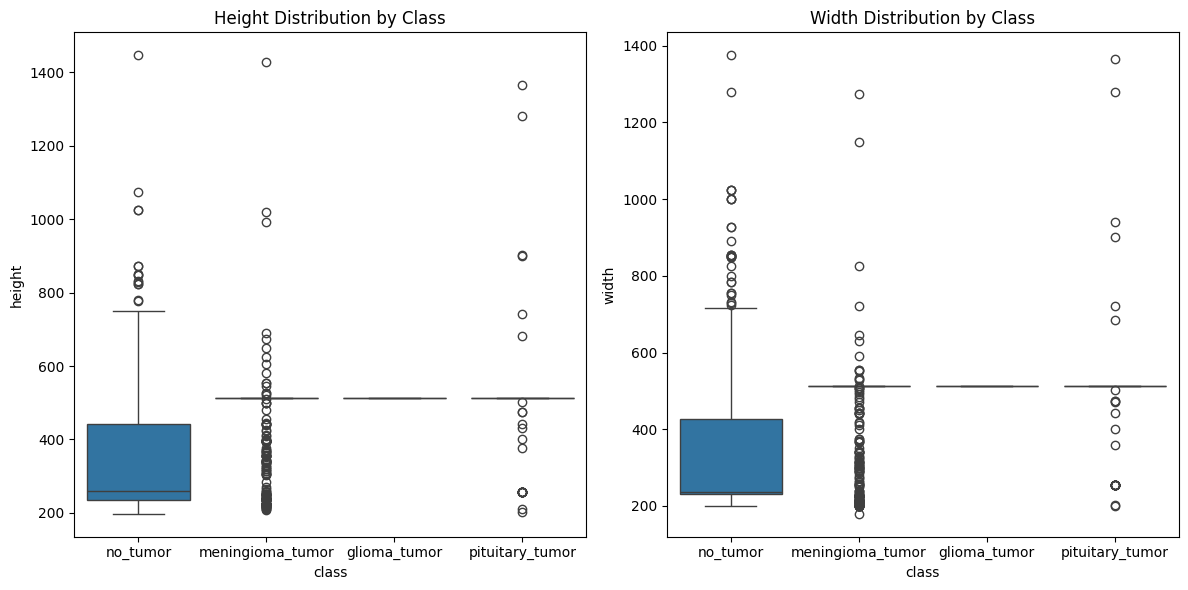

In [242]:
import seaborn as sns
#Plot boxplot of height and width by class
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.boxplot(x=image_dataframe['class'], y=image_dataframe['height'])
plt.title('Height Distribution by Class')
plt.subplot(1, 2, 2)

#Plot boxplot of height and width by class
sns.boxplot(x=image_dataframe['class'], y=image_dataframe['width'])
plt.title('Width Distribution by Class')
plt.tight_layout()
plt.show()
